# Overview:

# Dataset Description:

### restaurants.csv
This sub-dataset includes a total of 11 columns of different information about restaurants on Ubereats. The full column names are: 
* id (Restaurant id)
* position (Restaurant position in the search result)
* name (Restaurant name)
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category)
* price_range
* full_address (Restaurant full address)
* zip_code (Zip code)
* lat (Latitude)
* long (Longitude)

### restaurant-menus.csv
The second sub-dataset is called restaurant-menus.csv, and it contains information about restaurants’menu. There are 5 columns in this sub-dataset: 
* restaurant_id (Restaurant id),
* category (Menu category)
* name (Menu Name)
* description (Menu description)
* price (Menu price)


# Dataset overview:

Restaurant Dataset:

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

restaurant = pd.read_csv("Data/restaurants.csv")
# import the restaurant data
restaurant.head()
# view the restaurant dataset


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


Restaurant menus Dataset:

In [5]:
restaurant_menu = pd.read_csv("Data/restaurant-menus.csv")
# import the restaurant data
restaurant_menu.head()
# view the dataset

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


# 1. Clean the Dataset


In [6]:
unique_price_ranges = restaurant['price_range'].unique()
unique_price_ranges

array(['$', nan, '$$', '$$$', '$$$$', '$$$$$$$$$$$$$$$$$'], dtype=object)

Show that there is only one record with "price range" column to be '$$$$$$$$$$$$$$$$$'

In [7]:
x_price_range_records = restaurant[restaurant['price_range'] == '$$$$$$$$$$$$$$$$$']
x_price_range_records

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
45118,45119,20,Schlotzsky's Deli,NaN,NaN,"Pizza, Salads, Deli, Sandwich, Healthy",$$$$$$$$$$$$$$$$$,"8745 Memorial Blvd, Port Arthur, TX, 77640",77640,29.945992,-93.995933


 We can see that there is only one record with $$$$$$$$$$$$$$$$$	price range, and it's clearly unreasonable to have that much "$" sign since the highest level is $$$$ on uber eats app, and we also remove the records where the price range is undefined (NaN)

In [8]:
valid_price_ranges = ['$', '$$', '$$$', '$$$$']
# normal data range
restaurant_data = restaurant[restaurant['price_range'].isin(valid_price_ranges)]
restaurant_data.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
5,6,75,Ocean Restaurant,NaN,NaN,"Seafood, Sushi, Steak",$$,"1218 20th Street South, Birmingham, AL, 35205",35205,33.498630,-86.795740
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440


To define Menu Diveristy, I went the restaurant-menus dataset, and record how many category each restaurant has. Since the price range is already given, I did not collect the price column values

* Remove the records with empty score

In [9]:
category_counts = restaurant_menu.groupby('restaurant_id')['category'].nunique()
category_counts
data = pd.merge(restaurant_data, category_counts, how='left', left_on='id', right_on='restaurant_id')
# merge the category value into the restaurant table
data.rename(columns={'category_y': 'category'}, inplace=True)
# rename column
data = data.dropna(subset=['score'])
#remove all recoords with empty score column
data.rename(columns={'category_x': 'restaurant_category'}, inplace=True)
# change the restaurant category to avoid duplicated names
data['restaurant_category'] = data['restaurant_category'].astype(str)
# convert all to string type
data
# our data


,id,position,name,score,ratings,restaurant_category,price_range,full_address,zip_code,lat,lng,category
4,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,7.0
10,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,13.0
11,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,3.0
13,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,4.0
14,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52832,63449,9,Walgreens (701 E NOLANA AVE),4.8,11.0,"Pharmacy, Convenience, Everyday Essentials, Baby",$,"701 E Nolana Ave, Mcallen, TX, 78504",78504,26.237390,-98.206520,19.0
52844,63461,114,Cosmic Wings (Mcallen North),4.4,22.0,"American, Bar Food, Wings, Fast Food, Chicken,...",$,"4601 N 10th Street, McAllen, TX, 78504",78504,26.244310,-98.223730,6.0
52846,63463,41,Whataburger (4017 N 23rd St),5.0,26.0,"Burgers, Fast Food, Burgers, Sandwiches, American",$$,"4017 N 23rd St, McAllen, TX, 78504",78504,26.242120,-98.239670,7.0
52848,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984,20.0


## Clean restaurant_category column

In [10]:
omit_type = []
# get all the modified categories
for index, row in data.iterrows():
    categories = row['restaurant_category'].split(',')
    cleaned_categories = []  # List to hold cleaned categories
    
    for cat in categories:
        omit_type.append(cat)
        clean_cat = cat.lstrip().lower()  # Remove leading spaces
        clean_cat.lower()
        cleaned_categories.append(clean_cat)  # Append cleaned category to list
    
    # Join the cleaned categories back into a single string and update the DataFrame
    data.loc[index, 'restaurant_category'] = ','.join(cleaned_categories)

### We can see from below that there is a lot of types that are repetitive and contain empty space at front

In [11]:
set(omit_type)

{' AAPI-owned',
 ' Adult',
 ' Affordable Meals',
 ' Afghan',
 ' African',
 ' Alcohol',
 ' Allergy Friendly',
 ' American',
 ' Appetizers',
 ' Arabian',
 ' Arepa',
 ' Argentinian',
 ' Armenian',
 ' Asado',
 ' Asian',
 ' Asian Cuisine',
 ' Asian Fusion',
 ' Asian-owned',
 ' Aus Burger',
 ' Australian',
 ' Açaí',
 ' BBQ',
 ' Baby',
 ' Bacon',
 ' Bagels',
 ' Bakery',
 ' Balkan',
 ' Bangladeshi',
 ' Bar Food',
 ' Barbecue',
 ' Barbeque',
 ' Barfood',
 ' Beef Noodles',
 ' Beer',
 ' Belgian',
 ' Bento',
 ' Biryani',
 ' Bistro',
 ' Black-owned',
 ' Bolivian',
 ' Bowls',
 ' Braised Pork Rice',
 ' Brazilian',
 ' Breakfast &amp; Brunch',
 ' Breakfast and Brunch',
 ' British',
 ' Brunch',
 ' Bubble Tea',
 ' Burgers',
 ' Burmese',
 ' Burritos',
 ' ButcherShop',
 ' Cafe',
 ' Cajun',
 ' Canadian',
 ' Candy',
 ' Cantonese',
 ' Caribbean',
 ' Carnicería',
 ' Cheese',
 ' Cheesesteak',
 ' Chicken',
 ' Chicken Strips',
 ' Chicken Wings',
 ' Chinese',
 ' Coffee &amp; Tea',
 ' Coffee and Tea',
 ' Colombian'

### We can originally, the restaurant_category ha sa total of 495 categories

In [12]:
len(set(omit_type))

495

In [13]:
kept_categories =[]
for index, row in data.iterrows():
    categories = row['restaurant_category'].split(',')
    for cat in categories:
        kept_categories.append(cat)
set(kept_categories)

{'aapi-owned',
 'adult',
 'affordable meals',
 'afghan',
 'african',
 'african: ethiopian',
 'african: other',
 'alcohol',
 'allergy friendly',
 'ameican',
 'american',
 'american (new)',
 'american (traditional)',
 'appetizers',
 'arabian',
 'arepa',
 'argentinian',
 'armenian',
 'asado',
 'asian',
 'asian cuisine',
 'asian fusion',
 'asian-owned',
 'asian: other',
 'aus burger',
 'australian',
 'authentic italian',
 'açaí',
 'baby',
 'bacon',
 'bagels',
 'bakery',
 'balkan',
 'bangladeshi',
 'bar / pub food',
 'bar food',
 'barbecue',
 'barbeque',
 'barfood',
 'bbq',
 'beef noodles',
 'beer',
 'belgian',
 'bento',
 'biryani',
 'bistro',
 'black-owned',
 'bolivian',
 'bowls',
 'braised pork rice',
 'brazilian',
 'breakfast',
 'breakfast &amp; brunch',
 'breakfast and brunch',
 'british',
 'brunch',
 'bubble tea',
 'burger',
 'burgers',
 'burmese',
 'burritos',
 'butchershop',
 'cafe',
 'cajun',
 'cajun / creole',
 'cambodian',
 'canadian',
 'candy',
 'cantonese',
 'caribbean',
 'carni

### After cleaning (removing empty space and uniform the cases), there is a total of 317 categories

In [14]:
len(set(kept_categories))

317

# restaurant_category cleaned

In [15]:
categories = data['restaurant_category'].astype(str).dropna().str.split(',')
distinct_categories_corrected = set(cat.strip() for sublist in categories for cat in sublist if cat != 'nan')
# show all distinct category for later encoding
distinct_categories_corrected



{'aapi-owned',
 'adult',
 'affordable meals',
 'afghan',
 'african',
 'african: ethiopian',
 'african: other',
 'alcohol',
 'allergy friendly',
 'ameican',
 'american',
 'american (new)',
 'american (traditional)',
 'appetizers',
 'arabian',
 'arepa',
 'argentinian',
 'armenian',
 'asado',
 'asian',
 'asian cuisine',
 'asian fusion',
 'asian-owned',
 'asian: other',
 'aus burger',
 'australian',
 'authentic italian',
 'açaí',
 'baby',
 'bacon',
 'bagels',
 'bakery',
 'balkan',
 'bangladeshi',
 'bar / pub food',
 'bar food',
 'barbecue',
 'barbeque',
 'barfood',
 'bbq',
 'beef noodles',
 'beer',
 'belgian',
 'bento',
 'biryani',
 'bistro',
 'black-owned',
 'bolivian',
 'bowls',
 'braised pork rice',
 'brazilian',
 'breakfast',
 'breakfast &amp; brunch',
 'breakfast and brunch',
 'british',
 'brunch',
 'bubble tea',
 'burger',
 'burgers',
 'burmese',
 'burritos',
 'butchershop',
 'cafe',
 'cajun',
 'cajun / creole',
 'cambodian',
 'canadian',
 'candy',
 'cantonese',
 'caribbean',
 'carni

In [16]:
indexed_dict = {value: index for index, value in enumerate(distinct_categories_corrected)}
indexed_dict

{'rolls': 0,
 'eastern european': 1,
 'malaysian': 2,
 'pho': 3,
 'jamaican': 4,
 'wraps': 5,
 'breakfast and brunch': 6,
 'pizza': 7,
 'crepe': 8,
 'non halal': 9,
 'allergy friendly': 10,
 'everyday essentials': 11,
 'snacks': 12,
 'cajun': 13,
 'thali': 14,
 'stir\u200b fried': 15,
 'vietnamese': 16,
 'family friendly': 17,
 'caribbean': 18,
 'seafood': 19,
 'armenian': 20,
 'cambodian': 21,
 'dessert: other': 22,
 'indonesian': 23,
 'bbq': 24,
 'bangladeshi': 25,
 'fried foods': 26,
 'salads': 27,
 'noodles': 28,
 'juice bars': 29,
 'wine': 30,
 'burmese': 31,
 'western-style japanese food': 32,
 'diner': 33,
 'açaí': 34,
 'dumpling house': 35,
 'west indian': 36,
 'tamale': 37,
 'european': 38,
 'szechuan': 39,
 'scottish': 40,
 'frozen yogurt': 41,
 'ramen': 42,
 'gifts': 43,
 'sushi': 44,
 'home &amp; personal care': 45,
 'sanwiches': 46,
 'friedrice': 47,
 'fish/seafood': 48,
 'pretzel': 49,
 'breakfast &amp; brunch': 50,
 'cantonese': 51,
 'sichuan': 52,
 'japanese: ramen': 53

In [17]:
def encode_categories_safe(category_str):
    if pd.isna(category_str):
        return ''
    categories = category_str.split(',')
    encoded_categories = [str(indexed_dict.get(category, -1)) for category in categories]
    return ', '.join(encoded_categories)

data['encoded_category'] = data['restaurant_category'].apply(encode_categories_safe)
data.rename(columns={'category': 'menu_diversity'}, inplace=True)
#data.head()
data

,id,position,name,score,ratings,restaurant_category,price_range,full_address,zip_code,lat,lng,menu_diversity,encoded_category
4,7,27,Jinsei Sushi,4.7,63.0,"sushi,asian,japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,7.0,"44, 123, 310"
10,14,51,Panera (521 Fieldstown Road),4.6,44.0,"breakfast and brunch,salad,sandwich,family mea...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,13.0,"6, 279, 262, 186, 7, 102, 178, 298"
11,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"ice cream &amp; frozen yogurt,comfort food,des...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,3.0,"264, 232, 64"
13,19,30,Falafel Cafe,4.9,48.0,"middle eastern,mediterranean,vegetarian,greek,...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,4.0,"206, 240, 109, 87, 102"
14,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"american,burgers,sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,8.0,"178, 71, 262"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52832,63449,9,Walgreens (701 E NOLANA AVE),4.8,11.0,"pharmacy,convenience,everyday essentials,baby",$,"701 E Nolana Ave, Mcallen, TX, 78504",78504,26.237390,-98.206520,19.0,"140, 56, 11, 239"
52844,63461,114,Cosmic Wings (Mcallen North),4.4,22.0,"american,bar food,wings,fast food,chicken,fami...",$,"4601 N 10th Street, McAllen, TX, 78504",78504,26.244310,-98.223730,6.0,"178, 122, 199, 223, 298, 186, 224, 232"
52846,63463,41,Whataburger (4017 N 23rd St),5.0,26.0,"burgers,fast food,burgers,sandwiches,american",$$,"4017 N 23rd St, McAllen, TX, 78504",78504,26.242120,-98.239670,7.0,"71, 223, 71, 309, 178"
52848,63465,2,IHOP (4321 N 10th St),4.6,56.0,"american,breakfast and brunch,burger,comfort f...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984,20.0,"178, 6, 170, 232, 79, 75, 279, 285, 186"


In [18]:
cuisine_nation_dict = {
    "American": ["American (Traditional)", "Creole", "Southern", "New American", "BBQ", "Cajun", "Tex Mex", "American", "Traditional American", "Hot Dog", "Barbeque", "Southern", "Fried Chicken", "Chicken Wings", "Fast Food", "Burgers", "Chicken", "Soul Food", "Cajun / Creole"],
    "Japanese": ["Japanese sweets", "Japanese set items", "Japanese Skewer food", "Japanese: Sushi", "Ramen", "Japanese: Ramen", "Japanese Style curry", "Japanese BBQ", "Sushi Bar", "Sushi", "Teppanyaki","Tempura"],
    "Chinese": ["Chinese: Other", "Dim Sum", "Chinese", "Chinese: Sichuan", "Chinese: Noodles & Dumplings", "Chinese: Cantonese", "Cantonese", "Chinese Food", "Dumpling House", "Chinese: Cantonese"],
    "Thai": ["Thai", "Northern Thai", "Som Tum", "Tom Yum", "Southern Thai","Southern Thai (due to its unique blend)"],
    "French": ["Modern French", "French tacos", "French"],
    "Indian": ["Thali", "Indian", "Indian Curry", "North Indian", "South Indian", "Biryani"],
    "Italian": ["pizza", "Pizza", "Italian", "Authentic Italian", "Pasta", "italian"],
    "Mexican": ["Mexican", "Tacos", "Quesadillas", "Tex Mex","New Mexican"],
    "British": ["Fish and Chips", "Scottish", "British"],
    "German": ["German"],
    "Turkish": ["Turkish", "Kebab"],
    "Spanish": ["Spanish", "Tapas"], 
    "Korean": ["Korean"],
    "Vietnamese": ["Vietnamese", "Pho"],
    "Middle Eastern": ["Jewish", "Persian", "Arabian", "Middle Eastern", "Syrian", "Lebanese"],
    "African": ["African", "Ethiopian", "African: Ethiopian", "Moroccan", "Nigerian", "West African", "South African"],
    "Caribbean": ["Jamaican", "Caribbean", "Puerto Rican"],
    "South American": ["Argentinian", "Peruvian", "Venezuelan", "Brazilian", "Colombian", "Bolivian"],
    "Asian": ["Asian", "South Asian", "Southeast Asian", "Eastern European (some countries in this region are considered part of Asia)", "Asian Fusion", "Asian Cuisine", "Taiwanese", "Singaporean", "Indonesian", "Asian-owned", "Asian: Other", "Mongolian", "Filipino", "Laotian", "Nepalese"],
    "European": ["Modern European", "European", "East European", "Northern European (not explicitly listed but covers countries like Sweden, Norway)", "Balkan", "Danish", "Swedish", "Norwegian", "Finnish", "Polish", "Hungarian", "Czech", "Russian", "Portuguese", "Belgian", "Austrian", "Swiss","Gyro"],
    "Australian": ["Australian", "Aus Burger"]
}

cuisine_nation_lower = {k.lower(): [x.lower() for x in v] for k, v in cuisine_nation_dict.items()}

dict = {}
for cuisine, categories in cuisine_nation_lower.items():
    for category in categories:
        dict[category] = cuisine
#set up dictionary for encoding


# transform all category into nationality

In [19]:

data['nationality'] = 'noset'  # Set default nationality
data['restaurant_category'] = data['restaurant_category'].astype(str)

for index, row in data.iterrows():
    categories = row['restaurant_category'].split(',')
    for cat in categories:
        if cat in dict:
            data.loc[index, 'nationality'] = dict[cat]  # Update the DataFrame directly
            print(cat, dict[cat])



sushi japanese
asian asian
pizza italian
american american
chicken american
middle eastern middle eastern
american american
burgers american
italian italian
mexican mexican
fast food american
mexican mexican
pizza italian
fast food american
mexican mexican
french french
pizza italian
indian indian
asian asian
sushi japanese
asian asian
chinese chinese
asian asian
mexican mexican
asian asian
chicken american
chinese chinese
mexican mexican
tacos mexican
chinese chinese
asian asian
asian fusion asian
chinese chinese
asian asian
indian indian
asian asian
asian asian
chinese chinese
pizza italian
american american
italian italian
burgers american
american american
mexican mexican
new mexican mexican
american american
burgers american
american american
american american
fried chicken american
southern american
fast food american
american american
american american
american american
pizza italian
italian italian
pasta italian
pizza italian
american american
italian italian
american american


### Following are data that do not labeled belong to a certain area

In [20]:
r = data[data['nationality']=="noset"]
r

,id,position,name,score,ratings,restaurant_category,price_range,full_address,zip_code,lat,lng,menu_diversity,encoded_category,nationality
11,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"ice cream &amp; frozen yogurt,comfort food,des...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,3.0,"264, 232, 64",noset
26,35,80,Starbucks (Hwy 11 and Avenue W),4.6,21.0,"bakery,breakfast and brunch,cafe,coffee &amp; tea",$,"2401 Crossplex Boulevard 101, Birmingham, AL, ...",35208,33.497944,-86.874391,13.0,"218, 6, 241, 276",noset
29,38,61,CHOP N FRESH,4.8,39.0,"salads,vegetarian,bowls",$,"291 Rele Street, Mountain Brook, AL, 35223",35223,33.486040,-86.773660,4.0,"27, 109, 144",noset
30,39,56,Underground Vegan,4.8,62.0,"vegan,healthy,vegetarian",$,"2012 Magnolia Avenue South R3, Birmingham, AL,...",35205,33.500900,-86.796270,6.0,"201, 102, 109",noset
32,41,15,McAlister's Deli (1801 4th Avenue South),4.7,100.0,"sandwich,salads,healthy,family meals",$,"1801 4th Ave S, Birmingham, AL, 35233",35233,33.507150,-86.803990,15.0,"262, 27, 102, 186",noset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52800,63416,100,Walgreens (7080 Virginia Pkwy),4.7,13.0,"pharmacy,convenience,everyday essentials,baby",$,"7080 Virginia Pkwy, Mckinney, TX, 75071",75071,33.199780,-96.709890,19.0,"140, 56, 11, 239",noset
52813,63429,296,7-Eleven (7990 W Eldorado Pkwy),4.4,75.0,"convenience,everyday essentials,snacks,home &a...",$,"7990 W Eldorado Pkwy, Mckinney, TX, 75070",75070,33.175506,-96.721200,9.0,"56, 11, 12, 45, 106",noset
52814,63430,94,7-Eleven (421 Stacy Rd.),4.7,72.0,"convenience,everyday essentials,snacks,home &a...",$,"421 Stacy Rd., Fairview, TX, 75069",75069,33.130249,-96.643786,9.0,"56, 11, 12, 45, 106",noset
52823,63439,17,Starbucks (10th &amp; Jonquil),4.9,69.0,"bakery,breakfast and brunch,cafe,coffee &amp; tea",$,"3509 N 10th St, Mcallen, TX, 78501",78501,26.235322,-98.225118,13.0,"218, 6, 241, 276",noset


In [21]:
data = data[data['nationality']!="noset"]
data

,id,position,name,score,ratings,restaurant_category,price_range,full_address,zip_code,lat,lng,menu_diversity,encoded_category,nationality
4,7,27,Jinsei Sushi,4.7,63.0,"sushi,asian,japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,7.0,"44, 123, 310",asian
10,14,51,Panera (521 Fieldstown Road),4.6,44.0,"breakfast and brunch,salad,sandwich,family mea...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,13.0,"6, 279, 262, 186, 7, 102, 178, 298",american
13,19,30,Falafel Cafe,4.9,48.0,"middle eastern,mediterranean,vegetarian,greek,...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,4.0,"206, 240, 109, 87, 102",middle eastern
14,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"american,burgers,sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,8.0,"178, 71, 262",american
18,27,113,Ruscelli's Food Truck at Mojo Pub,4.7,100.0,"italian,exclusive to eats",$,"2801 7th Ave S, Birmingham, AL, 35233",35233,33.511130,-86.788388,13.0,"193, 224",italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52828,63445,4,Stripes (4829 N 10th Street),3.5,68.0,"everyday essentials,convenience,home &amp; per...",$,"4829 N 10TH STREET, Mcallen, TX, 78504",78504,26.247360,-98.223000,6.0,"11, 56, 45, 12, 7, 178, 106",american
52844,63461,114,Cosmic Wings (Mcallen North),4.4,22.0,"american,bar food,wings,fast food,chicken,fami...",$,"4601 N 10th Street, McAllen, TX, 78504",78504,26.244310,-98.223730,6.0,"178, 122, 199, 223, 298, 186, 224, 232",american
52846,63463,41,Whataburger (4017 N 23rd St),5.0,26.0,"burgers,fast food,burgers,sandwiches,american",$$,"4017 N 23rd St, McAllen, TX, 78504",78504,26.242120,-98.239670,7.0,"71, 223, 71, 309, 178",american
52848,63465,2,IHOP (4321 N 10th St),4.6,56.0,"american,breakfast and brunch,burger,comfort f...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984,20.0,"178, 6, 170, 232, 79, 75, 279, 285, 186",american


In [22]:
label_encoder = LabelEncoder()
data['price_range'] = label_encoder.fit_transform(data['price_range']) + 1
data.head()

C:\Users\wu114\AppData\Local\Temp\ipykernel_12352\892160891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_range'] = label_encoder.fit_transform(data['price_range']) + 1


,id,position,name,score,ratings,restaurant_category,price_range,full_address,zip_code,lat,lng,menu_diversity,encoded_category,nationality
4,7,27,Jinsei Sushi,4.7,63.0,"sushi,asian,japanese",1,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,7.0,"44, 123, 310",asian
10,14,51,Panera (521 Fieldstown Road),4.6,44.0,"breakfast and brunch,salad,sandwich,family mea...",1,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,13.0,"6, 279, 262, 186, 7, 102, 178, 298",american
13,19,30,Falafel Cafe,4.9,48.0,"middle eastern,mediterranean,vegetarian,greek,...",1,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,4.0,"206, 240, 109, 87, 102",middle eastern
14,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"american,burgers,sandwich",2,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,8.0,"178, 71, 262",american
18,27,113,Ruscelli's Food Truck at Mojo Pub,4.7,100.0,"italian,exclusive to eats",1,"2801 7th Ave S, Birmingham, AL, 35233",35233,33.511130,-86.788388,13.0,"193, 224",italian


# DAG

# Part 2

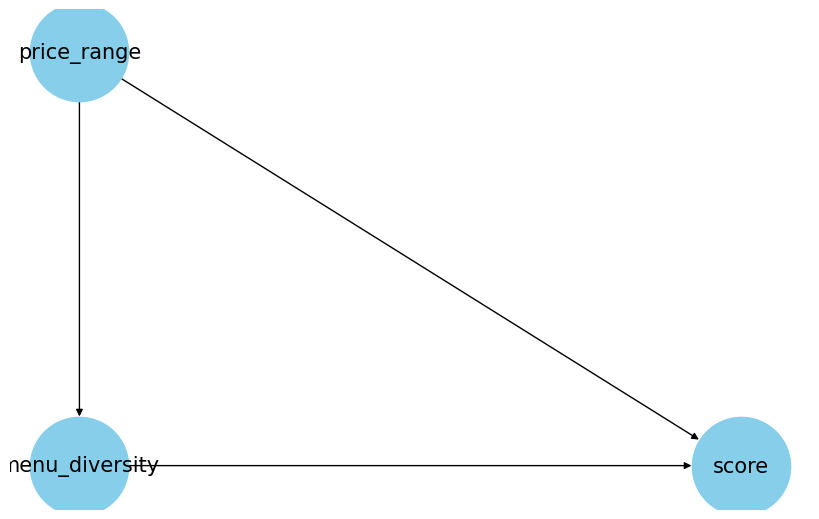

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

edges = [('price_range', 'score'), ('menu_diversity', 'score'), ('price_range', 'menu_diversity')]
G.add_edges_from(edges)

# Manually specify the positions of each node
pos = {
    'menu_diversity': (1, 0),  # X, Y coordinates
    'price_range': (1, 1),
    'nationality': (2, 1),
    'score': (2, 0)
}
# Draw the DAG
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, edge_color='k', linewidths=1, font_size=15)

# Show the plot
plt.show()

# Analysis

### Define helper function

In [24]:
def standardize(series):
    return (series - series.mean()) / series.std()

### 1. Priors

### Distribution of menu_diverisity, score, and price_range

### Choose prior

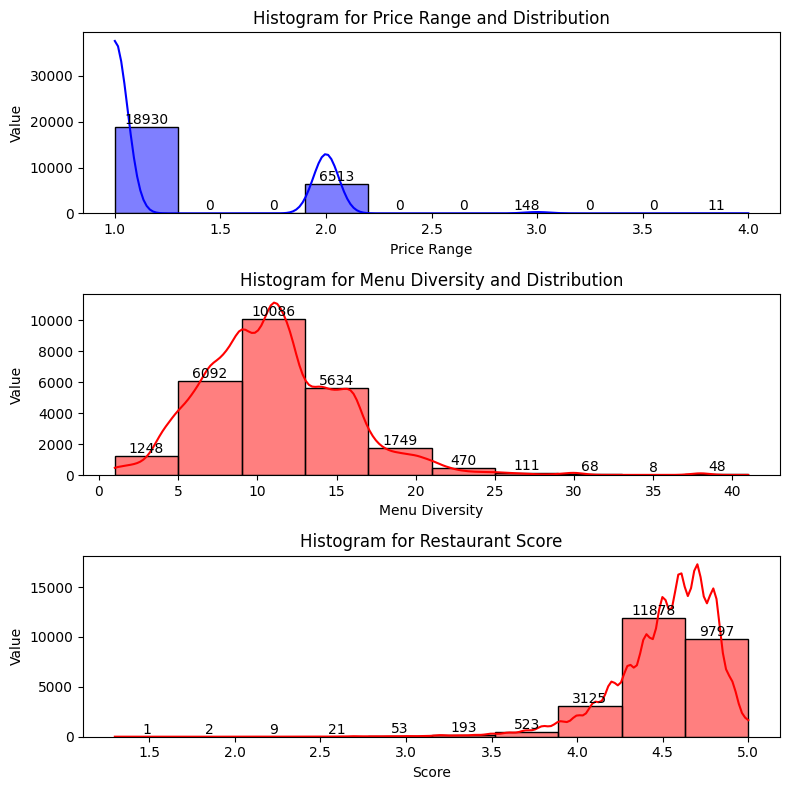

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

hist_data = sns.histplot(data['price_range'], bins=10, color='blue', kde=True, ax=axs[0])
axs[0].set_title('Histogram for Price Range and Distribution')
axs[0].set_xlabel('Price Range')
axs[0].set_ylabel('Value')

for p in hist_data.patches:
    axs[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Histogram with KDE and annotations for 'menu_diversity'
hist_data = sns.histplot(data['menu_diversity'], bins=10, color='red', kde=True, ax=axs[1])
axs[1].set_title('Histogram for Menu Diversity and Distribution')
axs[1].set_xlabel('Menu Diversity')
axs[1].set_ylabel('Value')

# Add annotations for the 'menu_diversity' histogram
for p in hist_data.patches:
    axs[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
    
# Histogram with KDE and annotations for 'menu_diversity'
hist_data = sns.histplot(data['score'], bins=10, color='red', kde=True, ax=axs[2])
axs[2].set_title('Histogram for Restaurant Score')
axs[2].set_xlabel('Score')
axs[2].set_ylabel('Value')

# Add annotations for the 'menu_diversity' histogram
for p in hist_data.patches:
    axs[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')


plt.tight_layout()

plt.show()

In [1]:
import pymc as pm
import numpy as np
import pandas as pd

# define values
p = data['price_range']
d = data['menu_diversity']
s = data['score']

s

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


NameError: name 'data' is not defined

In [ ]:
d

In [30]:
alpha = pm.Normal("alpha", 0, 1.5, shape=2)


TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [ ]:
with pm.Model() as m_G:
 alpha = pm.Normal("alpha", 0, 1.5, shape=2)
 p = pm.Deterministic("p", pm.math.invlogit(alpha[G]))
 mod_A = pm.Binomial("A", N, p, observed=A)

 idata_G = pm.sample(10000, target_accept=0.95)